#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto Módulo 2 Limpieza y preprocesado de datos

## Introducción

En la vida laboral de un científico de datos, la tarea más importante es realizar un buen análisis. Sin un entendimiento del problema, resultará difícil aplicar un buen modelo para su resolución. Por ello, ahora que comprendiste las técnicas revisadas a lo largo de este módulo, serás capaz de aplicar el tratamiento necesario de un conjunto de datos para su explotación.

## Demo

Este documento te servirá como inspiración para crear el tuyo: https://drive.google.com/file/d/1LKiMVyepbdTBK_Fs_9e6-y2ybB0Kem-Y/view?usp=sharing

## ¿Qué construirás?

Un análisis sobre un conjunto de datos para su posterior modelado. Este proyecto se dividirá en 4 secciones:

*   Análisis Exploratorio
*   Limpieza de datos
*   Procesamiento de datos
*   Reducción de dimensiones

## Criterios de evaluación

* Análisis Exploratorio: Calidad del análisis, entendimiento de las variables y estudio de las correlaciones con el objetivo. (25pts)
  - Excelente: Comprende la multicolinealidad entre las variables y señala gráficamente los valores atípicos en las distribuciones.
  - Suficiente: Comprende la relevancia de las variables e identifica las variables más significativas y cuales tienen mayor relación con el objetivo.

*   Limpieza de datos: Eliminación de faltantes, duplicados y atípicos de manera correcta, eligiendo el mejor modo para imputar valores faltantes. (25pts)

  - Excelente: Elimina los valores atí­picos y los imputa eligiendo el mejor modo para imputar valores faltantes.
  - Suficiente: Elimina las variables que no cumplen con el criterio de completitud y se imputan los valores restantes sin justificar o comprar el método de imputación.


*   Procesamiento de datos: Correcto uso de transformadores, justificando el porque se eligió uno sobre algún otro. (25pts)

  - Excelente: Transforma las variables de acuerdo a su naturaleza utilizando distintos métodos para escalar dependiendo de los valores de cada variable.
  - Transforma las variables categóricas y variables continuas.

*   Reducción de dimensiones: Selección de la mejor técnica para reducir las dimensiones, además de justificar el porque se esta reduciendo a cierto número sobre cualquier otro. (25pts)

  - Excelente: Elige el óptimo número de dimensiones de acuerdo a varias técnicas, justificando el porque se eligió el número de dimensiones final.
  - Suficiente: Reduce el conjunto de datos propuesto para una correcta reducción de nuestro set de datos.


## Objetivos

El participante:

* Realizará un correcto análisis y tratamiento de datos, el cuál le permita preparar y limpiar los datos de la forma más adecuada para utilizarlos posteriormente en un modelo.
* Comprenderá la relevacia de las variables e identificará las variables más significativas que tienen mayor relación con el objetivo.
* Comprenderá la multicolinealidad entre las variables y señalará gráficamente los valores atípicos en las distribuciones.
* Eliminará valores faltantes, duplicados y atípicos de manera correcta, usando el modo más adecuado para su objetivo.
* Usará de forma adecuada los transformadores utilizando distintos métodos para escalar en función de los valores de cada variable.
* Hará una correcta reducción del set de datos y elegirá el número óptimo de dimensiones mediante diversas técnicas.

¡Es momento de ponerte a prueba y descubrir todo lo que eres capaz!

Comienza por analizar cada uno de los apartados que te solicitamos para este proyecto y trata de usar todas las herramientas que aprendiste a lo largo del módulo. Recuerda que el detalle que pongas en cada proceso será tomado en cuenta en tu evaluación, revisa los criterios en la sección de tareas de Teams.

¡Te desemos éxito!

## Conjunto de datos para analizar.
Se tiene información de Lending Club, empresa estadounidense de préstamos con sede en San Francisco, California. En dicha compañía, los prestatarios pueden acceder fácilmente a préstamos con tasas de interés bajas.
El dataset contiene datos de todos los préstamos emitidos durante el periodo 2007-2015, con el estado actual del préstamo (actual, cancelado, completamente pagado) y la información de pago más reciente.

Las características adicionales incluyen puntajes de crédito, número de consultas financieras y cobros, entre otros.

Puedes descargar la información al hacer clic en el siguiente enlace:https://drive.google.com/file/d/1oxjXn7PkuqeSdQz5dOMXZOJfhJoBlX3T/view?usp=sharing

¡Comencemos!

In [ ]:
# Se importan las librerías que vamos a usar en el proyecto.

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  functools import reduce
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

In [ ]:
# Se descarga el archivo y se lo guarda en google drive.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se lee el archivo con pd.read_csv.

df_lending=pd.read_csv("/content/drive/MyDrive/dataset_Proyecto_M2.csv")

## Parte 1
Dado el _dataset_:

* Identifica el tipo de datos de cada variable y verifica la completitud.
* Determina las variables que son continuas, discretas y la variable objetivo.

> Puedes contar los valores dentro de una variable y utilizar las funciones que desees para cumplir estos objetivos; mientras más completo sea el EDA, mejor puntaje obtendrás.



In [ ]:
"""Se utiliza la función .info( ) que nos devuelve información(número de filas, número de columnas,
 índices, tipos de las columnas y memoria usada) sobre el data frame."""

df_lending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

> Recomendaciones: usa funciones como `.info`, `.head` y `.duplicated`.



In [ ]:
# Se utiliza el método .head( ) de pandas para que devuelva las primeras 5 filas del data frame. De esta manera se busca conocer más acerca de las variables.

df_lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
""" Se crea una variable llamada duplicados para almacenar el resultado de aplicar
la función .duplicated( ) de pandas al data frame df_lending. Esta función se usa
para identificar y marcar las filas duplicadas en un data frame. Devuelve una serie
booleana que indica si cada fila es duplicada o no."""

duplicados = df_lending.duplicated()

# Se imprime el contenido de la variable duplicados.

print(duplicados)




0         False
1         False
2         False
3         False
4         False
          ...  
887374    False
887375    False
887376    False
887377    False
887378    False
Length: 887379, dtype: bool


In [ ]:
"""Se crea una lista que contiene los índices de las filas duplicadas en el data frame.
Mediante el atributo .index de los data frames de pandas se accede a los índices de las filas. Luego
se utiliza la serie boolena 'duplicados'para indexar el atributo 'index' del data frame df_lending.
Solo se seleccionan los índices de las filas donde 'duplicados' sea 'True'. Las filas marcadas como
duplicadas serán seleccionadas. Por último el método .tolist( ) se usa para convertir los índices
seleccionados en una lista de Python."""

indices_duplicados = df_lending.index[duplicados].tolist()
print(indices_duplicados)


[]


De acuerdo a la impresión en pantalla anterior, podemos comprobar que no hay elementos duplicados en el data frame df_lending.

In [ ]:
# Se comprueba la completitud de las variables que componen nuestro conjunto de datos.
completitud = pd.DataFrame(df_lending.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df_lending.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,dti_joint,886870,0.057360
1,annual_inc_joint,886868,0.057585
2,verification_status_joint,886868,0.057585
3,il_util,868762,2.097976
4,mths_since_rcnt_il,866569,2.345108
...,...,...,...
69,total_pymnt_inv,0,100.000000
70,total_rec_prncp,0,100.000000
71,total_rec_int,0,100.000000
72,pymnt_plan,0,100.000000


Al estudiar la completitud de las variables que componen el data frame df_lending se puede constatar que hay varias variables con niveles de completitud muy bajos, por ejemplo: dti_joint que presenta un valor de 0.057360.

In [ ]:
# Se utiliza el método de pandas .describe para obtener estadísticas descriptivas de cada columna numérica del data frame.
df_lending.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [ ]:
"""
El siguiente código crea una función llamada 'rename_cols'
que toma el data frame 'df_lending', una lista de nombres de columnas 'cols' y un
prefijo 'prefix' como argumentos.
La función realiza la tarea de cambiar el nombre de las columnas del data frame
agregando el prefijo especificado a cada una de las columnas de la lista 'cols'.

"""
def rename_cols(df_lending,cols,prefix):
  new_feats=[prefix+col for col in cols]
  df_lending=df_lending.rename(columns=dict(zip(cols,new_feats)))
  return df_lending

In [ ]:
"""
Después de definir las listas 'v_feats', 'c_feats' y 'tgt', se utiliza la función rename_cols
para cambiar el nombre de las columnas del DataFrame df_lending. La lista 'v_feats' contiene las variables
cualitativas, la 'c_feats' está integrada por las cuantitativas y 'tgt' contiene la variable objetivo que también es
cuantitativa(La definición de la variable objetivo es: 'The total amount committed to that loan at that point in time.')

"""

v_feats=["term","grade","sub_grade","emp_title","emp_length","home_ownership","verification_status","issue_d",
         "loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","earliest_cr_line",
         "initial_list_status","last_pymnt_d","next_pymnt_d","last_credit_pull_d","application_type","verification_status_joint"]
c_feats=["id","member_id","loan_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti",
         "delinq_2yrs","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util",
         "total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",
         "recoveries","collection_recovery_fee","last_pymnt_amnt","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code",
         "annual_inc_joint","dti_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m",
         "mths_since_rcnt_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m"]
tgt=["funded_amnt"]

df_lending=rename_cols(df_lending,v_feats,"v_")
df_lending=rename_cols(df_lending,c_feats,"c_")
df_lending=rename_cols(df_lending,tgt,"tgt_")

In [ ]:
# Se vuelve a imprimir el data frame 'df_lending' para mostar que las variables ahora tienen el prefijo que corresponde a su tipo.
df_lending.head()

,c_id,c_member_id,c_loan_amnt,tgt_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_emp_title,v_emp_length,v_home_ownership,c_annual_inc,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_url,v_desc,v_purpose,v_title,v_zip_code,v_addr_state,c_dti,c_delinq_2yrs,v_earliest_cr_line,c_inq_last_6mths,c_mths_since_last_delinq,c_mths_since_last_record,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,v_initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,v_last_pymnt_d,c_last_pymnt_amnt,v_next_pymnt_d,v_last_credit_pull_d,c_collections_12_mths_ex_med,c_mths_since_last_major_derog,c_policy_code,v_application_type,c_annual_inc_joint,c_dti_joint,v_verification_status_joint,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_open_acc_6m,c_open_il_6m,c_open_il_12m,c_open_il_24m,c_mths_since_rcnt_il,total_bal_il,c_il_util,c_open_rv_12m,c_open_rv_24m,c_max_bal_bc,c_all_util,c_total_rev_hi_lim,c_inq_fi,c_total_cu_tl,c_inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Parte 2
* Elimina los datos faltantes o duplicados con el método que sea más conveniente y justifica tu elección.

* Elimina las variables cuyo valor de completitud sea menor a 80; después, identifica y modifica aquellos valores atípicos (_outliers_).

In [ ]:
"""
Se vuelve a comprobar la completitud de las variables que componen el data frame 'df_lending',
pero ahora las variables aparecen con el prefijo que indica su tipo.

"""
completitud = pd.DataFrame(df_lending.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df_lending.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,c_dti_joint,886870,0.057360
1,c_annual_inc_joint,886868,0.057585
2,v_verification_status_joint,886868,0.057585
3,c_il_util,868762,2.097976
4,c_mths_since_rcnt_il,866569,2.345108
...,...,...,...
69,c_total_pymnt_inv,0,100.000000
70,c_total_rec_prncp,0,100.000000
71,c_total_rec_int,0,100.000000
72,v_pymnt_plan,0,100.000000


In [ ]:
# Este código se utiliza para identificar las columnas con una completitud menor a 80 %, las cuales se pondrán en una lista llamada 'null_cols'.
null_cols=list(completitud[completitud["completitud"]<80]["columna"].values)
null_cols

['c_dti_joint',
 'c_annual_inc_joint',
 'v_verification_status_joint',
 'c_il_util',
 'c_mths_since_rcnt_il',
 'c_inq_last_12m',
 'c_total_cu_tl',
 'c_open_acc_6m',
 'c_open_il_6m',
 'c_open_il_24m',
 'c_open_il_12m',
 'total_bal_il',
 'c_inq_fi',
 'c_open_rv_12m',
 'c_open_rv_24m',
 'c_all_util',
 'c_max_bal_bc',
 'v_desc',
 'c_mths_since_last_record',
 'c_mths_since_last_major_derog',
 'c_mths_since_last_delinq',
 'v_next_pymnt_d']

Cumpliendo con lo solicitado para esta parte del proyecto se eliminan las variables que tienen una completitud menor a 80 %.

In [ ]:
# Se crea un nuevo DataFrame que ya no contiene a las varibales que tienen una completitud menor a 80 %.
df_lending_new = df_lending.drop(columns=null_cols)

# df_lending_new contiene el DataFrame sin las columnas eliminadas,
# y df_lending sigue siendo el DataFrame original sin cambios.


In [ ]:
# De la biblioteca 'sklearn' y su módulo 'impute' se importa la clase 'SimpleImputer' para poder realizar la imputación de los valores faltantes.
from sklearn.impute import SimpleImputer

In [ ]:
# Se comprueba la completitud de las variables que componen nuestro nuevo conjunto de datos.
completitud1 = pd.DataFrame(df_lending_new.isnull().sum())
completitud1.reset_index(inplace = True)
completitud1 = completitud1.rename(columns = {"index":"columna",0:"total"})
completitud1["completitud"] = (1 - completitud1["total"] / df_lending_new.shape[0]) * 100
completitud1 = completitud1.sort_values(by = "completitud", ascending = True)
completitud1.reset_index(drop = True, inplace = True)
completitud1

,columna,total,completitud
0,c_total_rev_hi_lim,70276,92.080498
1,c_tot_coll_amt,70276,92.080498
2,c_tot_cur_bal,70276,92.080498
3,v_emp_title,51462,94.200674
4,v_emp_length,44825,94.948607
5,v_last_pymnt_d,17659,98.009982
6,c_revol_util,502,99.943429
7,v_title,152,99.982871
8,c_collections_12_mths_ex_med,145,99.983660
9,v_last_credit_pull_d,53,99.994027


In [ ]:
# Se crea una lista 'imputar' con aquellas columnas que tienen una completitud distinta de 100.
imputar = list(completitud1[completitud1["completitud"]!= 100]["columna"].values)
imputar

['c_total_rev_hi_lim',
 'c_tot_coll_amt',
 'c_tot_cur_bal',
 'v_emp_title',
 'v_emp_length',
 'v_last_pymnt_d',
 'c_revol_util',
 'v_title',
 'c_collections_12_mths_ex_med',
 'v_last_credit_pull_d',
 'c_acc_now_delinq',
 'c_total_acc',
 'c_pub_rec',
 'c_open_acc',
 'c_inq_last_6mths',
 'c_delinq_2yrs',
 'v_earliest_cr_line',
 'c_annual_inc']

In [ ]:
# Se instacia la clase 'SimpleImputer' y se la guarda en la variable 'imp'. En este caso el método de imputación será el del valor más frecuente (La moda).
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
"""
A continuación el código que sigue realiza lo siguiente:

'imp' es una instancia de la clase SimpleImputer.

'.fit()' es un método que se utiliza para ajustar un modelo a los datos de entrenamiento. En el contexto de imputación de datos,
este método se utiliza para calcular y almacenar los parámetros necesarios para llevar a cabo la imputación.

df_lending_new es el DataFrame de pandas con el que se está trabajando.

[imputar] es una selección de columnas en el DataFrame df_lending_new. 'imputar' es una lista o un objeto que contiene los nombres
de las columnas que se desean imputar.

El código imp.fit(df_lending_new[imputar]) ajusta un modelo a partir de las columnas especificadas en imputar en el DataFrame df_lending_new
con el propósito de imputar valores faltantes en esas columnas. El proceso de imputación se realiza con el fin de rellenar los valores faltantes
con valores calculados a partir de los datos existentes.

"""
imp.fit(df_lending_new[imputar])

SimpleImputer(strategy='most_frequent')

In [ ]:
"""
Esta parte del código toma las columnas especificadas en imputar en el DataFrame df_lending_new y las
llena con valores calculados a partir de los datos existentes.
Este proceso de imputación se realiza utilizando los parámetros o estadísticas previamente calculados por imp.fit().
El resultado es que las columnas seleccionadas en imputar ahora tienen sus valores faltantes reemplazados por valores calculados, en
este caso por el valor más frecuente en cada columna.

"""
df_lending_new[imputar]=imp.transform(df_lending_new[imputar])

Se tomo la decisión de imputar los valores faltantes en las columnas con el método de imputación del valor más frecuentes, es decir, con la moda. La razón es que entre las columnas que presentaban valores faltantes había varias variables de tipo cualitativas y éstas no admiten el cálculo de la media o de la moda. En tanto que las variables cuantitativas también permiten el uso del método del valor más frecuente.

In [ ]:
# Se comprueba que la imputación haya surtido efecto, evaluando la completitud de las variables que componen nuestro nuevo conjunto de datos.
completitud2 = pd.DataFrame(df_lending_new.isnull().sum())
completitud2.reset_index(inplace = True)
completitud2 = completitud2.rename(columns = {"index":"columna",0:"total"})
completitud2["completitud"] = (1 - completitud2["total"] / df_lending_new.shape[0]) * 100
completitud2 = completitud2.sort_values(by = "completitud", ascending = True)
completitud2.reset_index(drop = True, inplace = True)
completitud2

,columna,total,completitud
0,c_id,0,100.0
1,c_pub_rec,0,100.0
2,c_revol_bal,0,100.0
3,c_revol_util,0,100.0
4,c_total_acc,0,100.0
5,v_initial_list_status,0,100.0
6,c_out_prncp,0,100.0
7,c_out_prncp_inv,0,100.0
8,c_total_pymnt,0,100.0
9,c_total_pymnt_inv,0,100.0


In [ ]:
# Se utiliza el método de pandas .describe para obtener estadísticas descriptivas de cada columna numérica del data frame.
df_lending_new.describe()

,c_id,c_member_id,c_loan_amnt,tgt_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_dti,c_revol_bal,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_policy_code
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.0
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,18.157039,1.692079e+04,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,1.0
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,17.190626,2.242679e+04,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.0
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,11.910000,6.443000e+03,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,1.0
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,17.650000,1.187500e+04,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,1.0
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,23.950000,2.082900e+04,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,1.0
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9999.000000,2.904836e+06,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,1.0


In [ ]:
"""
En esta líneas, se importa la función train_test_split del módulo model_selection
de la biblioteca scikit-learn. Esta función se utiliza para dividir un conjunto de datos en dos subconjuntos:
uno para entrenar un modelo y otro para probarlo.

"""
from sklearn.model_selection import train_test_split

In [ ]:
"""Se utiliza el parámetro test_size para asignar al subconjunto de prueba un tamaño del 0.01 del total,
con el objetivo de no exceder los requerimientos de memoria disponibles."""
df_lending_new_train, df_lending_new_test = train_test_split(df_lending_new, test_size=0.01)

In [ ]:
df_lending_new_train.shape

(878505, 52)

In [ ]:
df_lending_new_test.shape

(8874, 52)

En los cálculos posteriores necesarios para la estandarización y reducción de dimensiones si trabajamos con los casos totales que componen el data frame se excede la cantidad de memoria RAM disponible en la versión gratuita de Google Colab. Por esa razón a partir de ahora se realizan todos los procedimientos en una muestra aleatoria de la población total que compone el data frame df_lending_new. Se procede a continuar con todos los cálculos restantes en el subconjunto df_lending_new_test.  

In [ ]:
# Se utiliza el método de pandas .describe para obtener estadísticas descriptivas de cada columna numérica de df_lending_new_test.
df_lending_new_test.describe()

,c_id,c_member_id,c_loan_amnt,tgt_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_dti,c_revol_bal,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_policy_code
count,8.874000e+03,8.874000e+03,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.0
mean,3.237293e+07,3.490940e+07,14739.514311,14724.749268,14671.125927,13.323627,435.335673,18.118218,16550.808993,8374.089228,8370.811339,7572.925335,7519.594636,5751.374257,1768.691794,0.363967,52.495302,6.201055,2178.207991,1.0
std,2.290218e+07,2.419399e+07,8408.834163,8406.317820,8430.558819,4.395574,242.754256,8.349351,19804.008993,8489.885716,8486.710719,7850.618256,7824.413248,6618.858273,2105.205684,3.709273,465.138904,82.083392,4853.036028,0.0
min,9.253300e+04,9.252900e+04,1000.000000,1000.000000,0.000000,5.320000,30.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.056500e+06,1.079135e+07,8000.000000,8000.000000,8000.000000,9.990000,260.017500,11.800000,6408.500000,0.000000,0.000000,1886.070000,1867.070000,1180.847500,435.990000,0.000000,0.000000,0.000000,280.335000,1.0
50%,3.405685e+07,3.672015e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,17.565000,11866.000000,6339.750000,6338.460000,4947.390000,4894.045000,3211.105000,1089.015000,0.000000,0.000000,0.000000,461.850000,1.0
75%,5.509162e+07,5.866243e+07,20000.000000,20000.000000,20000.000000,16.290000,569.640000,24.020000,20581.750000,13597.072500,13597.072500,10622.345000,10565.702500,8000.000000,2234.327500,0.000000,0.000000,0.000000,832.470000,1.0
max,6.860646e+07,7.350926e+07,35000.000000,35000.000000,35000.000000,27.880000,1340.290000,39.990000,427220.000000,35000.000000,35000.000000,55045.768851,55045.770000,35000.010000,21754.590000,98.700000,14816.670000,3703.430000,36016.450000,1.0


En esta parte del proyecto se identifican y modifican los valores atípicos (outliers) que presentan las variables cuantitativas contenidas en el data frame df_lending_new_test.

In [ ]:
# Se calcula el primer cuartil (Q1) y el tercer cuartil (Q3) de cada columna en el DataFrame df_lending_new_test.
Q1 = df_lending_new_test.quantile(0.25)
Q3 = df_lending_new_test.quantile(0.75)

# Se calcula el rango intercuartil (IQR), que es la diferencia entre Q3 y Q1.
IQR = Q3 - Q1

# Se define un umbral de '1.5' (esto es un valor común, pero puede ser ajustado según las necesidades).
umbral = 1.5

# Se crea una serie de valores booleanos llamada "outliers".
# Esta serie indicará para cada fila si contiene valores atípicos o no.
outliers = ((df_lending_new_test < (Q1 - umbral * IQR)) | (df_lending_new_test > (Q3 + umbral * IQR))).any(axis=1)

In [ ]:
# Se imprime la serie de valores booleanos 'outliers'.
print(outliers)

274204    False
26538      True
373365    False
369092    False
806272    False
          ...  
269920    False
200541     True
268631    False
823069    False
364294    False
Length: 8874, dtype: bool


In [ ]:
"""
En esta parte, se calcula la media de cada columna en el DataFrame
'df_lending_new_test' utilizando el método mean(). Esto crea un objeto de
Series de pandas llamado column_means, donde el índice del objeto
será el nombre de cada columna y el valor será la media de esa columna.

"""
column_means = df_lending_new_test.mean()

"""
Se reemplazan los valores atípicos en el DataFrame 'df_lending_new_test'. Para hacerlo:
'df_lending_new_test[outliers]' selecciona solo las columnas que contienen valores atípicos.
La variable outliers es una lista o una máscara booleana que indica qué columnas contienen valores atípicos.
'.apply()' se utiliza para aplicar una función a cada fila de estas columnas. La función que se aplica es una función
lambda que toma cada fila (que se representa como la variable 'row') y rellena los valores faltantes ('NaN') en esa fila
con los valores medios correspondientes de 'column_means'.

"""
df_lending_new_test[outliers] = df_lending_new_test[outliers].apply(lambda row: row.fillna(column_means))






In [ ]:
"""
Se utiliza el método de pandas .describe para obtener estadísticas descriptivas de
cada columna numérica del data frame luego de sustituir los outliers por la media de cada columna.

"""
df_lending_new_test.describe()

,c_id,c_member_id,c_loan_amnt,tgt_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_dti,c_revol_bal,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_policy_code
count,8.874000e+03,8.874000e+03,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.0
mean,3.237293e+07,3.490940e+07,14739.514311,14724.749268,14671.125927,13.323627,435.335673,18.118218,16550.808993,8374.089228,8370.811339,7572.925335,7519.594636,5751.374257,1768.691794,0.363967,52.495302,6.201055,2178.207991,1.0
std,2.290218e+07,2.419399e+07,8408.834163,8406.317820,8430.558819,4.395574,242.754256,8.349351,19804.008993,8489.885716,8486.710719,7850.618256,7824.413248,6618.858273,2105.205684,3.709273,465.138904,82.083392,4853.036028,0.0
min,9.253300e+04,9.252900e+04,1000.000000,1000.000000,0.000000,5.320000,30.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.056500e+06,1.079135e+07,8000.000000,8000.000000,8000.000000,9.990000,260.017500,11.800000,6408.500000,0.000000,0.000000,1886.070000,1867.070000,1180.847500,435.990000,0.000000,0.000000,0.000000,280.335000,1.0
50%,3.405685e+07,3.672015e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,17.565000,11866.000000,6339.750000,6338.460000,4947.390000,4894.045000,3211.105000,1089.015000,0.000000,0.000000,0.000000,461.850000,1.0
75%,5.509162e+07,5.866243e+07,20000.000000,20000.000000,20000.000000,16.290000,569.640000,24.020000,20581.750000,13597.072500,13597.072500,10622.345000,10565.702500,8000.000000,2234.327500,0.000000,0.000000,0.000000,832.470000,1.0
max,6.860646e+07,7.350926e+07,35000.000000,35000.000000,35000.000000,27.880000,1340.290000,39.990000,427220.000000,35000.000000,35000.000000,55045.768851,55045.770000,35000.010000,21754.590000,98.700000,14816.670000,3703.430000,36016.450000,1.0


No se observa una variación significativa entre los valores de los estadísticos descriptivos antes y después de sustituir los valores atípicos (outliers) por la media de cada columna. Este es un buen indicador de la confiabilidad del método elegido para tratar ouliers.

## Parte 3
Usa un transformador o los transformadores necesarios y justifica tu elección.

In [ ]:
"""En esta línea, se importan dos clases de la biblioteca scikit-learn (sklearn)
que se utilizan comúnmente para la preparación de datos en tareas de aprendizaje automático.
StandardScaler se utiliza para estandarizar características numéricas, mientras que OneHotEncoder
se utiliza para codificar variables categóricas en formato one-hot."""
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [ ]:
# Se imprimen todas las columnas que componen el data frame df_lending_new_test.
df_lending_new_test.columns

Index(['c_id', 'c_member_id', 'c_loan_amnt', 'tgt_funded_amnt',
       'c_funded_amnt_inv', 'v_term', 'c_int_rate', 'c_installment', 'v_grade',
       'v_sub_grade', 'v_emp_title', 'v_emp_length', 'v_home_ownership',
       'c_annual_inc', 'v_verification_status', 'v_issue_d', 'v_loan_status',
       'v_pymnt_plan', 'v_url', 'v_purpose', 'v_title', 'v_zip_code',
       'v_addr_state', 'c_dti', 'c_delinq_2yrs', 'v_earliest_cr_line',
       'c_inq_last_6mths', 'c_open_acc', 'c_pub_rec', 'c_revol_bal',
       'c_revol_util', 'c_total_acc', 'v_initial_list_status', 'c_out_prncp',
       'c_out_prncp_inv', 'c_total_pymnt', 'c_total_pymnt_inv',
       'c_total_rec_prncp', 'c_total_rec_int', 'c_total_rec_late_fee',
       'c_recoveries', 'c_collection_recovery_fee', 'v_last_pymnt_d',
       'c_last_pymnt_amnt', 'v_last_credit_pull_d',
       'c_collections_12_mths_ex_med', 'c_policy_code', 'v_application_type',
       'c_acc_now_delinq', 'c_tot_coll_amt', 'c_tot_cur_bal',
       'c_total_rev_

In [ ]:
"""
'columns_with_prefix_c':
Se crea una variable que se utilizará para almacenar la lista de columnas que
cumplen con la condición de comenzar con el prefijo _c (variables cuantitativas).

'[col for col in df_lending_new.columns if col.startswith("c_")]': Se crea una lista por comprensión,
que es una forma concisa de crear listas en Python.

'for col in df_lending_new.columns': Esto itera a través de todas las columnas en el DataFrame df_lending_new.

'if col.startswith("c_")': Aquí se aplica una condición. La función startswith("c_") se utiliza para verificar
 si el nombre de la columna (col) comienza con el prefijo "c_". Si la condición es verdadera, la columna se incluirá en la lista resultante.

'[col for col in df_lending_new.columns if col.startswith("c_")]': Finalmente, esta parte de la lista por comprensión crea una lista de las
columnas que cumplen con la condición.

'print(columns_with_prefix_c)': Esta línea imprime la lista resultante en la consola para poder ver las columnas que comienzan con "c_".
"""
columns_with_prefix_c = [col for col in df_lending_new_test.columns if col.startswith("c_")]
print(columns_with_prefix_c)


['c_id', 'c_member_id', 'c_loan_amnt', 'c_funded_amnt_inv', 'c_int_rate', 'c_installment', 'c_annual_inc', 'c_dti', 'c_delinq_2yrs', 'c_inq_last_6mths', 'c_open_acc', 'c_pub_rec', 'c_revol_bal', 'c_revol_util', 'c_total_acc', 'c_out_prncp', 'c_out_prncp_inv', 'c_total_pymnt', 'c_total_pymnt_inv', 'c_total_rec_prncp', 'c_total_rec_int', 'c_total_rec_late_fee', 'c_recoveries', 'c_collection_recovery_fee', 'c_last_pymnt_amnt', 'c_collections_12_mths_ex_med', 'c_policy_code', 'c_acc_now_delinq', 'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim']


In [ ]:
"""'columns_with_prefix_v': Se crea una variable que se utilizará para almacenar la lista de columnas que
cumplen con la condición de comenzar con el prefijo _v (variables cualitativas)."""

columns_with_prefix_v = [col for col in df_lending_new_test.columns if col.startswith("v_")]
print(columns_with_prefix_v)

['v_term', 'v_grade', 'v_sub_grade', 'v_emp_title', 'v_emp_length', 'v_home_ownership', 'v_verification_status', 'v_issue_d', 'v_loan_status', 'v_pymnt_plan', 'v_url', 'v_purpose', 'v_title', 'v_zip_code', 'v_addr_state', 'v_earliest_cr_line', 'v_initial_list_status', 'v_last_pymnt_d', 'v_last_credit_pull_d', 'v_application_type']


In [ ]:
"""'columns_with_prefix_tgt': Se crea una variable que se utilizará para almacenar la lista de columnas que
cumplen con la condición de comenzar con el prefijo _tgt (variable objetivo)."""
columns_with_prefix_tgt = [col for col in df_lending_new_test.columns if col.startswith("tgt_")]
print(columns_with_prefix_tgt)

['tgt_funded_amnt']


In [ ]:
# Selecciona las columnas cuantitativas del DataFrame 'df_lending_new_test'.
cuantitativas = df_lending_new_test[columns_with_prefix_c]

# Crea una instancia de la clase StandardScaler.
scaler = StandardScaler()

# Ajusta (calcula la media y la desviación estándar) y transforma los datos
cuantitativas_escaladas = scaler.fit_transform(cuantitativas)

# Ahora 'cuantitativas_escaladas' contiene los datos escalados estándar de las columnas seleccionadas.
# Se convierte 'cuantitativas' en un DataFrame mediante 'pd.DataFrame'.
cuantitativas = pd.DataFrame(cuantitativas_escaladas, columns=columns_with_prefix_c)
print(cuantitativas)


          c_id  c_member_id  c_loan_amnt  c_funded_amnt_inv  c_int_rate  \
0    -0.022480    -0.017694    -1.039384          -1.028593    0.379124   
1    -1.388774    -1.412732    -1.158313          -1.153147   -0.501357   
2    -0.642710    -0.625092    -0.563667          -0.554102    0.265367   
3    -0.578469    -0.561376    -0.563667          -0.571895   -1.659405   
4     0.459896     0.454366     1.458130           1.462485    0.151609   
...        ...          ...          ...                ...         ...   
8869  0.004201     0.006736    -0.468523          -0.459204    0.520183   
8870 -1.348008    -1.370078     0.030979           0.039012    0.228964   
8871  0.006408     0.009241     0.149909           0.157635    0.379124   
8872  0.433216     0.427872     0.030979           0.039012   -0.144159   
8873 -0.575775    -0.558830    -1.158313          -1.147216   -0.376224   

      c_installment  c_annual_inc     c_dti  c_delinq_2yrs  c_inq_last_6mths  \
0         -0.936661

In [ ]:
# Selecciona la columna del data frame 'df_lending_new_test' con la variable objetivo.
cuantitativa_tgt = df_lending_new_test[columns_with_prefix_tgt]

# Crea una instancia del StandardScaler
scaler = StandardScaler()

# Ajusta (calcula la media y la desviación estándar) y transforma los datos
tgt_escalada = scaler.fit_transform(cuantitativa_tgt)

# Ahora 'tgt_escalada' contiene los datos escalados estándar de las columnas seleccionadas
# Se convierte 'cuantitativa_tgt' nuevamente en un data frame.
cuantitativa_tgt = pd.DataFrame(tgt_escalada, columns=columns_with_prefix_tgt)
print(cuantitativa_tgt)


      tgt_funded_amnt
0           -1.037938
1           -1.156903
2           -0.562079
3           -0.562079
4            1.460323
...               ...
8869        -0.466907
8870         0.032745
8871         0.151710
8872         0.032745
8873        -1.156903

[8874 rows x 1 columns]


In [ ]:
# Selecciona las columnas del data frame lending_new_test que contienen variables cualitativas.
cualitativas = df_lending_new_test[columns_with_prefix_v]

# Crea una instancia del OneHotEncoder.
encoder = OneHotEncoder(sparse=False)

# Ajusta y transforma los datos.
encoded_data = encoder.fit_transform(cualitativas)

# Los datos codificados ahora están en 'encoded_data'.
# Se obtienen los nombres de las columnas codificadas.
encoded_columns = encoder.get_feature_names_out(input_features=columns_with_prefix_v)

# Se convierte'encoded_data' en un DataFrame con los nombres de las columnas
cualitativas = pd.DataFrame(encoded_data, columns=encoded_columns)
print(cualitativas)


      v_term_ 36 months  v_term_ 60 months  v_grade_A  v_grade_B  v_grade_C  \
0                   1.0                0.0        0.0        0.0        1.0   
1                   1.0                0.0        0.0        1.0        0.0   
2                   0.0                1.0        0.0        0.0        1.0   
3                   1.0                0.0        1.0        0.0        0.0   
4                   0.0                1.0        0.0        0.0        1.0   
...                 ...                ...        ...        ...        ...   
8869                0.0                1.0        0.0        0.0        0.0   
8870                1.0                0.0        0.0        0.0        1.0   
8871                0.0                1.0        0.0        0.0        1.0   
8872                1.0                0.0        0.0        0.0        1.0   
8873                1.0                0.0        0.0        1.0        0.0   

      v_grade_D  v_grade_E  v_grade_F  v_grade_G  v

In [ ]:
# Se concatenas los data frames 'cuantitativas', 'cuantitativa_tgt' y 'cualitativas' a lo largo del eje 1 (columnas).
final_df = pd.concat([cuantitativas, cuantitativa_tgt, cualitativas], axis=1 )

# Se imprime el data frame 'final_df' resultante de la concatenación.
print(final_df)

          c_id  c_member_id  c_loan_amnt  c_funded_amnt_inv  c_int_rate  \
0    -0.022480    -0.017694    -1.039384          -1.028593    0.379124   
1    -1.388774    -1.412732    -1.158313          -1.153147   -0.501357   
2    -0.642710    -0.625092    -0.563667          -0.554102    0.265367   
3    -0.578469    -0.561376    -0.563667          -0.571895   -1.659405   
4     0.459896     0.454366     1.458130           1.462485    0.151609   
...        ...          ...          ...                ...         ...   
8869  0.004201     0.006736    -0.468523          -0.459204    0.520183   
8870 -1.348008    -1.370078     0.030979           0.039012    0.228964   
8871  0.006408     0.009241     0.149909           0.157635    0.379124   
8872  0.433216     0.427872     0.030979           0.039012   -0.144159   
8873 -0.575775    -0.558830    -1.158313          -1.147216   -0.376224   

      c_installment  c_annual_inc     c_dti  c_delinq_2yrs  c_inq_last_6mths  \
0         -0.936661

OneHotEncoder se utiliza para crear columnas binarias (0 o 1) para cada categoría. Cada categoría se representa como un vector de bits, y cada variable categórica se convierte en múltiples columnas binarias.
Es útil cuando las categorías son nominales, es decir, no tienen un orden inherente, y cuando se desea tratar todas las categorías por igual.
Es una elección más segura cuando se tienen muchas categorías y no se desea asumir un orden artificial entre ellas.
En este proyecto, se presenta la situación de que se tienen muchas categorías en cada variable cualitativa y no existe un orden natural entre ellas por lo que OneHotEncoder aparece como una buena opción.

Para las denominadas variables cuantitativas se usa la estandarización a través de la clase StandardScaler.   
Luego de aplicar StandardScaler todas las variables pasan a tener media cero y desviación estándar uno. Esto permite que todas las variables tengan el mismo peso en el análisis. También es un requisito de la posterior reducción de dimensiones.

## Parte 4

Selecciona la mejor técnica para reducir las dimensiones y justifica por qué debe reducirse. Se recomienda indicar el número de dimensiones óptimo.

In [ ]:
"""Este código importa la clase 'PCA' del módulo 'decomposition' de la biblioteca scikit-learn.
PCA (Análisis de Componentes Principales) se utiliza para realizar análisis de componentes principales en datos con el fin de reducir
la dimensionalidad o explorar la estructura de los datos."""
from sklearn.decomposition import PCA

La variable objetivo generalmente no se incluye en un análisis de PCA (Análisis de Componentes Principales). PCA se utiliza para reducir la dimensionalidad y explorar la estructura de las variables explicativas o independientes en los datos del proyecto, no para modelar la relación entre esas variables y la variable objetivo.

Por lo tanto, la variable objetivo se excluye de un análisis de PCA, ya que la técnica se enfoca en las variables explicativas (las que se intenta reducir) en lugar de las variables de respuesta que se intenta predecir.

Otra decisión importante que tomé antes de realizar el análisis PCA fue incluir solamente variables cuantitativas. Algunos de los efectos nocivos que se evitan al tomar esa decisión son:

Problemas de escala: Las variables cualitativas codificadas como variables binarias pueden tener una escala muy diferente en comparación con las variables cuantitativas. Esto puede dar lugar a una influencia desproporcionada en el análisis y afectar la interpretación de las componentes principales. Al usar solo variables cuantitativas, se evita este problema de escala.

Ambigüedad en la interpretación: Cuando se mezclan variables cualitativas y cuantitativas en un PCA, la interpretación de las componentes principales puede volverse confusa. Las componentes pueden verse influidas por la codificación de las variables cualitativas, lo que hace que la interpretación sea menos clara.

Matriz de covarianza o correlación incorrecta: El PCA se basa en la matriz de covarianza o correlación entre las variables. Incluir variables cualitativas en el análisis puede conducir a cálculos incorrectos de covarianza o correlación, lo que afecta la precisión del análisis.

Influencia de la cardinalidad: Las variables cualitativas pueden tener diferentes números de categorías (cardinalidad). Esto puede llevar a una mayor variabilidad en las categorías con más valores, lo que puede influir en el análisis de manera desproporcionada. Al utilizar solo variables cuantitativas, se evita esta influencia no deseada.

Mayor complejidad en el preprocesamiento: La conversión de variables cualitativas en variables numéricas mediante codificación puede ser un proceso complicado y propenso a errores. Limitar el análisis a variables cuantitativas simplifica el preprocesamiento y reduce la posibilidad de errores en la codificación.



In [ ]:
"""
Se utiliza el data frame 'cuantitativas' que contiene todas las variables cuantitativas del data frame 'lending_new_test',
pero no incluye a la variable objetivo 'tgt_funded_amnt'. El análisis PCA se realizará solamente en las variables explicativas
o independientes cuantitativas.
Se utiliza el método de Pandas '.describe' para comprobar que todas las variables tengan media 0 y desvío estándar 1.

"""
cuantitativas.describe()

,c_id,c_member_id,c_loan_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_annual_inc,c_dti,c_delinq_2yrs,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_policy_code,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
count,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03,8874.0,8.874000e+03,8.874000e+03,8.874000e+03,8.874000e+03
mean,2.762421e-17,4.684105e-17,-4.343807e-17,-4.243719e-17,-1.449270e-16,-2.279998e-16,-1.853625e-16,-2.690358e-16,-2.722386e-17,-9.488316e-17,-1.217067e-16,-2.642316e-17,-2.161895e-17,-3.625177e-16,1.521333e-16,2.273993e-16,-1.449270e-16,-1.016891e-16,1.000877e-17,1.601404e-18,-5.204561e-17,2.562246e-17,3.202807e-18,1.601404e-18,3.302895e-17,3.683228e-17,0.0,-3.563123e-17,7.406491e-18,4.363825e-17,-2.402105e-18
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-1.409569e+00,-1.439152e+00,-1.634030e+00,-1.740330e+00,-1.820940e+00,-1.668100e+00,-1.587148e+00,-2.170137e+00,-3.740065e-01,-7.129078e-01,-1.995836e+00,-3.502429e-01,-8.357773e-01,-2.304879e+00,-1.936378e+00,-9.864162e-01,-9.863990e-01,-9.646822e-01,-9.610968e-01,-8.689865e-01,-8.401989e-01,-9.812918e-02,-1.128658e-01,-7.555005e-02,-4.488594e-01,-1.046824e-01,0.0,-6.391151e-02,-1.309148e-01,-8.336494e-01,-1.021192e+00
25%,-1.018145e+00,-9.969175e-01,-8.015254e-01,-7.913475e-01,-7.584482e-01,-7.222450e-01,-6.295563e-01,-7.567743e-01,-3.740065e-01,-7.129078e-01,-6.684414e-01,-3.502429e-01,-5.121630e-01,-7.208863e-01,-6.810266e-01,-9.864162e-01,-9.863990e-01,-7.244239e-01,-7.224622e-01,-6.905699e-01,-6.330863e-01,-9.812918e-02,-1.128658e-01,-7.555005e-02,-3.910913e-01,-1.046824e-01,0.0,-6.391151e-02,-1.309148e-01,-6.850449e-01,-5.215523e-01
50%,7.353057e-02,7.484691e-02,-2.068791e-01,-1.982336e-01,-7.590504e-02,-2.174571e-01,-2.074553e-01,-6.626258e-02,-3.740065e-01,-7.129078e-01,-9.955783e-02,-3.502429e-01,-2.365719e-01,4.224358e-02,-1.788859e-01,-2.396327e-01,-2.394881e-01,-3.344556e-01,-3.355776e-01,-3.838143e-01,-3.228735e-01,-9.812918e-02,-1.128658e-01,-7.555005e-02,-3.536868e-01,-1.046824e-01,0.0,-6.391151e-02,-1.309148e-01,-4.191032e-01,-3.054917e-01
75%,9.920436e-01,9.818290e-01,6.256256e-01,6.321259e-01,6.748924e-01,5.532834e-01,3.701565e-01,7.068949e-01,-3.740065e-01,3.134296e-01,4.693257e-01,-3.502429e-01,2.035531e-01,7.644353e-01,5.743250e-01,6.152353e-01,6.158518e-01,3.884524e-01,3.893301e-01,3.397493e-01,2.211955e-01,-9.812918e-02,-1.128658e-01,-7.555005e-02,-2.773138e-01,-1.046824e-01,0.0,-6.391151e-02,-1.309148e-01,4.217764e-01,2.481635e-01
max,1.582188e+00,1.595522e+00,2.409564e+00,2.411468e+00,3.311784e+00,3.728072e+00,1.957097e+01,2.619726e+00,1.186395e+01,8.524129e+00,7.864812e+00,2.457116e+01,2.073784e+01,3.816955e+00,7.771674e+00,3.136369e+00,3.137928e+00,6.047360e+00,6.074430e+00,4.419234e+00,9.494096e+00,2.651236e+01,3.174322e+01,4.504489e+01,6.972985e+00,3.590119e+01,0.0,2.978613e+01,3.408811e+01,9.393685e+00,1.609486e+01


In [ ]:
"""
El atributo 'cuantitativas.shape' devuelve una tupla con dos valores: (número de filas, número de columnas),
lo que proporciona información sobre las dimensiones de los datos cuantitativos almacenados en 'cuantitativas'.

"""
cuantitativas.shape

(8874, 31)

In [ ]:
# Se crear una instancia de PCA
pca = PCA()

# Aquí se ajustan y transforman los datos almacenados en 'cuantitativas'.
X_pca = pca.fit_transform(cuantitativas)


In [ ]:
"""
'explained_variance' : Esta variable almacena la varianza explicada por cada uno de los componentes principales resultantes del análisis PCA.
'pca.explained_variance_ratio_': Es un atributo del objeto PCA (pca) que proporciona una lista de valores que representan la fracción de varianza
explicada por cada componente principal. Estos valores están ordenados en orden descendente, lo que significa que el primer valor en la lista es
la fracción de varianza explicada por el primer componente principal, el segundo valor es la fracción explicada por el segundo componente principal
y así sucesivamente.
'print(explained_variance)': Esta línea imprime los valores de la variable explained_variance, que son las fracciones de varianza explicada por cada componente
principal. Los valores impresos muestran la contribución relativa de cada componente principal a la varianza total en los datos.

"""
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance)

Varianza explicada por cada componente principal:
[2.02597379e-01 1.70350746e-01 7.31745693e-02 6.51631458e-02
 5.34049932e-02 4.73353133e-02 4.14588863e-02 3.92878764e-02
 3.57300197e-02 3.48617480e-02 3.21701051e-02 3.07516470e-02
 2.99073619e-02 2.82922305e-02 2.51693470e-02 1.92186544e-02
 1.86455030e-02 1.24914471e-02 1.13479001e-02 9.58846651e-03
 6.61766277e-03 4.92589591e-03 3.72908225e-03 2.10545035e-03
 1.34035011e-03 3.04402497e-04 1.97955574e-05 9.93794898e-06
 8.27745238e-08 2.69568708e-16 1.15273922e-33]


In [ ]:
"""
'variance_df': Esta variable se utiliza para almacenar un DataFrame de pandas. El DataFrame contiene dos columnas: 'Componente Principal' y
'Varianza Explicada".
'pd.DataFrame()': Esta función de pandas se utiliza para crear un DataFrame. Los datos del DataFrame se especifican en un diccionario donde
las claves son los nombres de las columnas y los valores son listas o arrays que contienen los datos de esas columnas.
'{'Componente Principal': range(1, len(explained_variance) + 1), 'Varianza Explicada': explained_variance}': En este diccionario, se crean dos columnas.
La primera columna se llama "Componente Principal" y contiene una secuencia de números que van desde 1 hasta la longitud de explained_variance + 1.
Esto se hace utilizando la función range(1, len(explained_variance) + 1). La segunda columna se llama 'Varianza Explicada' y contiene los valores
almacenados en la variable explained_variance, que son las fracciones de varianza explicada por cada componente principal.

"""
variance_df = pd.DataFrame({'Componente Principal': range(1, len(explained_variance) + 1), 'Varianza Explicada': explained_variance})
print(variance_df)

    Componente Principal  Varianza Explicada
0                      1        2.025974e-01
1                      2        1.703507e-01
2                      3        7.317457e-02
3                      4        6.516315e-02
4                      5        5.340499e-02
5                      6        4.733531e-02
6                      7        4.145889e-02
7                      8        3.928788e-02
8                      9        3.573002e-02
9                     10        3.486175e-02
10                    11        3.217011e-02
11                    12        3.075165e-02
12                    13        2.990736e-02
13                    14        2.829223e-02
14                    15        2.516935e-02
15                    16        1.921865e-02
16                    17        1.864550e-02
17                    18        1.249145e-02
18                    19        1.134790e-02
19                    20        9.588467e-03
20                    21        6.617663e-03
21        

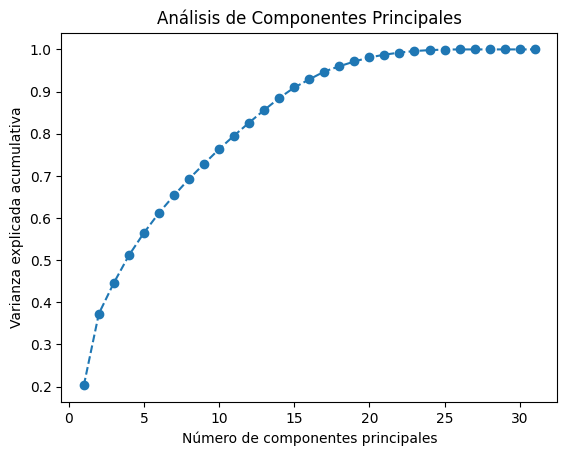

In [ ]:
"""
'plt.plot()': Esta función se utiliza para crear un gráfico. En este caso, se está creando un gráfico de líneas.

'range(1, len(explained_variance) + 1)': El primer argumento de 'plt.plot()' es el eje X del gráfico. Aquí se está generando una secuencia de números
desde 1 hasta la longitud de 'explained_variance' + 1. Estos números representan el número de componentes principales.

'explained_variance.cumsum()': El segundo argumento de 'plt.plot()' es el eje Y del gráfico. 'explained_variance' es una lista de las fracciones
de varianza explicada por cada componente principal, y '.cumsum()' se utiliza para calcular la suma acumulativa de esas fracciones.
Esto representa la varianza explicada acumulativa en función del número de componentes principales.

'marker='o'': Este argumento se utiliza para especificar el tipo de marcador en el gráfico. En este caso, se utiliza "o"
para representar puntos en el gráfico.

'linestyle='--'': Este argumento se utiliza para especificar el estilo de línea en el gráfico. En este caso, se utiliza "--"
para representar una línea punteada.

"""
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.title('Análisis de Componentes Principales')
plt.show()

In [ ]:
"""
'n_components': En esta línea, se crea una variable llamada n_components y se le asigna el valor 20.
Esto significa que se está eligiendo conservar solo los 20 primeros componentes principales resultantes del análisis PCA.

'X_reduced': Esta es la variable donde se almacenarán los datos reducidos, es decir, los datos originales proyectados en solo los primeros 20
componentes principales.

'X_pca': X_pca es el resultado del análisis PCA previamente realizado en los datos. X_pca contiene todas las proyecciones de los datos originales
en los componentes principales ordenados por su importancia.

'[:, :n_components]': Esta parte de la línea se utiliza para seleccionar las primeras n_components columnas de X_pca.
El uso de ' : ' en el primer conjunto de corchetes significa que se seleccionarán todas las filas de X_pca, y ':n_components' significa que
se seleccionará las primeras 'n_components' columnas. Esto es lo que reduce la dimensionalidad de los datos, ya que se está conservando
solo la información contenida en los primeros 20 componentes principales.

"""
n_components = 20
X_reduced = X_pca[:, :n_components]


Del análisis del gráfico de líneas se puede concluir que los primeros 20 componentes principales explican cerca del 98 % de la varianza explicada acumulativa. Debido a esto se decide conservar los primeros 20 componentes principales y descartar el resto. De esta forma se reducen las dimensiones del data frame de 31 a 20 y se obtiene la explicación de una cantidad significativa de varianza.

> Recuerda incluir en tu análisis los gráficos adecuados para comunicar lo que deseas expresar. Para favorecer tu entendimiento del programa, se sugiere el uso de comentarios (#) en cada bloque de código.

